# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from IPython.display import display
from IPython.lib.display import YouTubeVideo
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", "display.max_columns", 1000):
        display(df)

# Generating & Reading Frame-wise Data

In [4]:
!scenedetect

Usage: scenedetect [OPTIONS] COMMAND1 [ARGS]... [COMMAND2 [ARGS]...]...

  For example:

  scenedetect -i video.mp4 -s video.stats.csv detect-content list-scenes

  Note that the following options represent [OPTIONS] above. To list the
  optional [ARGS] for a particular COMMAND, type `scenedetect help COMMAND`.
  You can also combine commands (e.g. scenedetect [...] detect-content save-
  images --png split-video).

Options:
  -i, --input VIDEO      [Required] Input video file. May be specified
                         multiple times to concatenate several videos
                         together.
  -o, --output DIR       Output directory for all files (stats file, output
                         videos, images, log files, etc...).
  -f, --framerate FPS    Force framerate, in frames/sec (e.g. -f 29.97).
                         Disables check to ensure that all input videos have
                         the same framerates.
  -d, --downscale N      Integer factor to downscale frames by

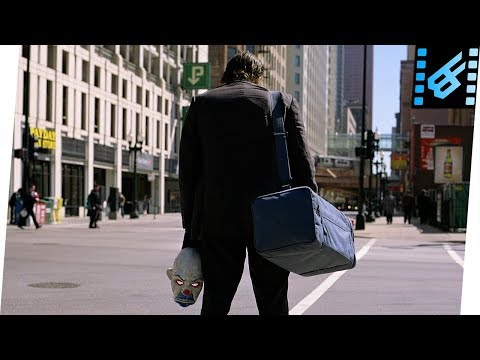

In [5]:
YouTubeVideo('cyq7jrZz_HY')

In [7]:
video_PATH = '/Users/rahulsomani/Documents/FilmAnalysis/new/tdk-bankrobbery.mp4'


In [11]:
!scenedetect -i tdk-bankrobbery.mp4 -s video.stats.csv detect-content list-scenes

[PySceneDetect] Loaded 1 video, framerate: 23.98 FPS, resolution: 1280 x 720
[PySceneDetect] Downscale factor set to 5, effective resolution: 256 x 144
[PySceneDetect] Scene list CSV file name format:
  $VIDEO_NAME-Scenes.csv
[PySceneDetect] Detecting scenes...
100%|██████████████████████████████████| 7097/7097 [00:36<00:00, 193.87frames/s]
[PySceneDetect] Processed 7097 frames in 36.6 seconds (average 193.86 FPS).
[PySceneDetect] Saving frame metrics to stats file: video.stats.csv
Writing 7096 frames to CSV...
[PySceneDetect] Detected 107 scenes, average shot length 2.8 seconds.
[PySceneDetect] Writing scene list to CSV file:
  tdk-bankrobbery-Scenes.csv
[PySceneDetect] Scene List:
-----------------------------------------------------------------------
 | Scene # | Start Frame |  Start Time  |  End Frame  |   End Time   |
-----------------------------------------------------------------------
 |      1  |           0 | 00:00:00.000 |         256 | 00:00:10.677 |
 |      2  |         2

In [89]:
raw_stats = pd.read_csv('video.stats.csv', low_memory = False, skiprows = 1)
shotlist_raw = pd.read_csv('tdk-bankrobbery-Scenes.csv', low_memory = False, skiprows = 1)

    raw_stats contains the HSV values of each frame in the video

In [5]:
raw_stats.head()

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
0,1,00:00:00.042,7.875524,6.514187,7.492296,9.620090
1,2,00:00:00.083,6.751998,6.101535,5.829074,8.325385
2,3,00:00:00.125,8.437012,7.547390,7.758870,10.004774
3,4,00:00:00.167,8.767886,8.189345,7.991591,10.122721
4,5,00:00:00.209,7.997215,6.814317,7.709418,9.467909


    shotlist_raw contains PySceneDetect's version of when a cut was made. This is mostly accurate, but our goal is to improve this

In [6]:
shotlist_raw.head()
shotlist_raw.tail()

,Scene Number,Start Frame,Start Timecode,Start Time (seconds),End Frame,End Timecode,End Time (seconds),Length (frames),Length (timecode),Length (seconds)
0,1,0,00:00:00.000,0.000,256,00:00:10.677,10.677,256,00:00:10.677,10.677
1,2,256,00:00:10.677,10.677,318,00:00:13.263,13.263,62,00:00:02.586,2.586
2,3,318,00:00:13.263,13.263,341,00:00:14.223,14.223,23,00:00:00.959,0.959
3,4,341,00:00:14.223,14.223,397,00:00:16.558,16.558,56,00:00:02.336,2.336
4,5,397,00:00:16.558,16.558,414,00:00:17.267,17.267,17,00:00:00.709,0.709


,Scene Number,Start Frame,Start Timecode,Start Time (seconds),End Frame,End Timecode,End Time (seconds),Length (frames),Length (timecode),Length (seconds)
102,103,6430,00:04:28.185,268.185,6605,00:04:35.484,275.484,175,00:00:07.299,7.299
103,104,6605,00:04:35.484,275.484,6650,00:04:37.360,277.360,45,00:00:01.877,1.877
104,105,6650,00:04:37.360,277.360,6684,00:04:38.778,278.778,34,00:00:01.418,1.418
105,106,6684,00:04:38.778,278.778,6861,00:04:46.161,286.161,177,00:00:07.382,7.382
106,107,6861,00:04:46.161,286.161,7097,00:04:56.004,296.004,236,00:00:09.843,9.843


# Exploring & Analysing the Data

### Bar-Plot To Visualise Preliminary Shot Length 

<Figure size 1008x720 with 0 Axes>

Text(0.5,0,'Shot Number')

Text(0,0.5,'Length of Shot')

<BarContainer object of 107 artists>

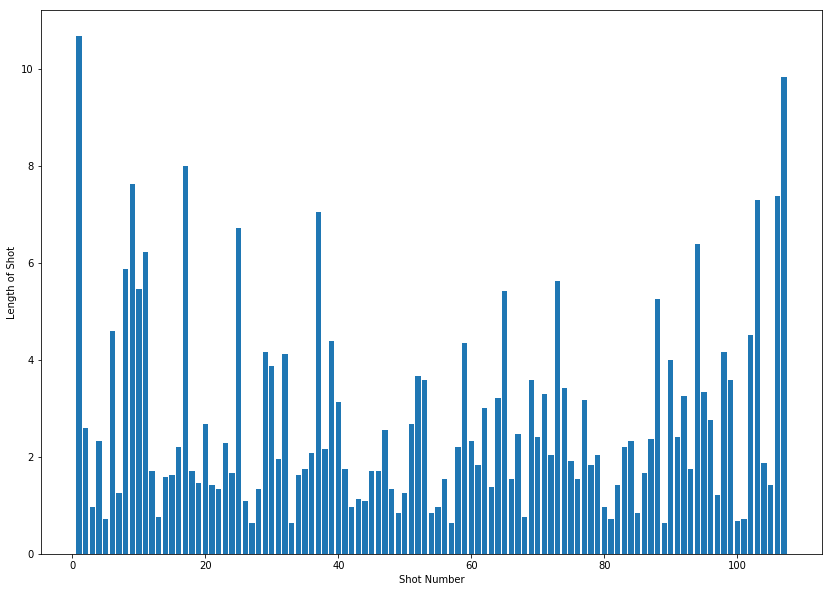

In [8]:
plt.figure(figsize=(14, 10))
plt.xlabel('Shot Number'); plt.ylabel('Length of Shot')
plt.bar(height=shotlist_raw['Length (seconds)'], x = shotlist_raw['Scene Number'])

- As a starting point, it would be useful to investigate data from 10-20 frames before and after every cut that was detected. 



### Plotting HSL Values 

- Whenever there is a spike in HSV values, a cut detection is triggered
- Viewing the graph in its entirety isn't of much help but gives us an overall view anyways

<Figure size 2160x1440 with 0 Axes>

<BarContainer object of 7096 artists>

<function matplotlib.pyplot.show(*args, **kw)>

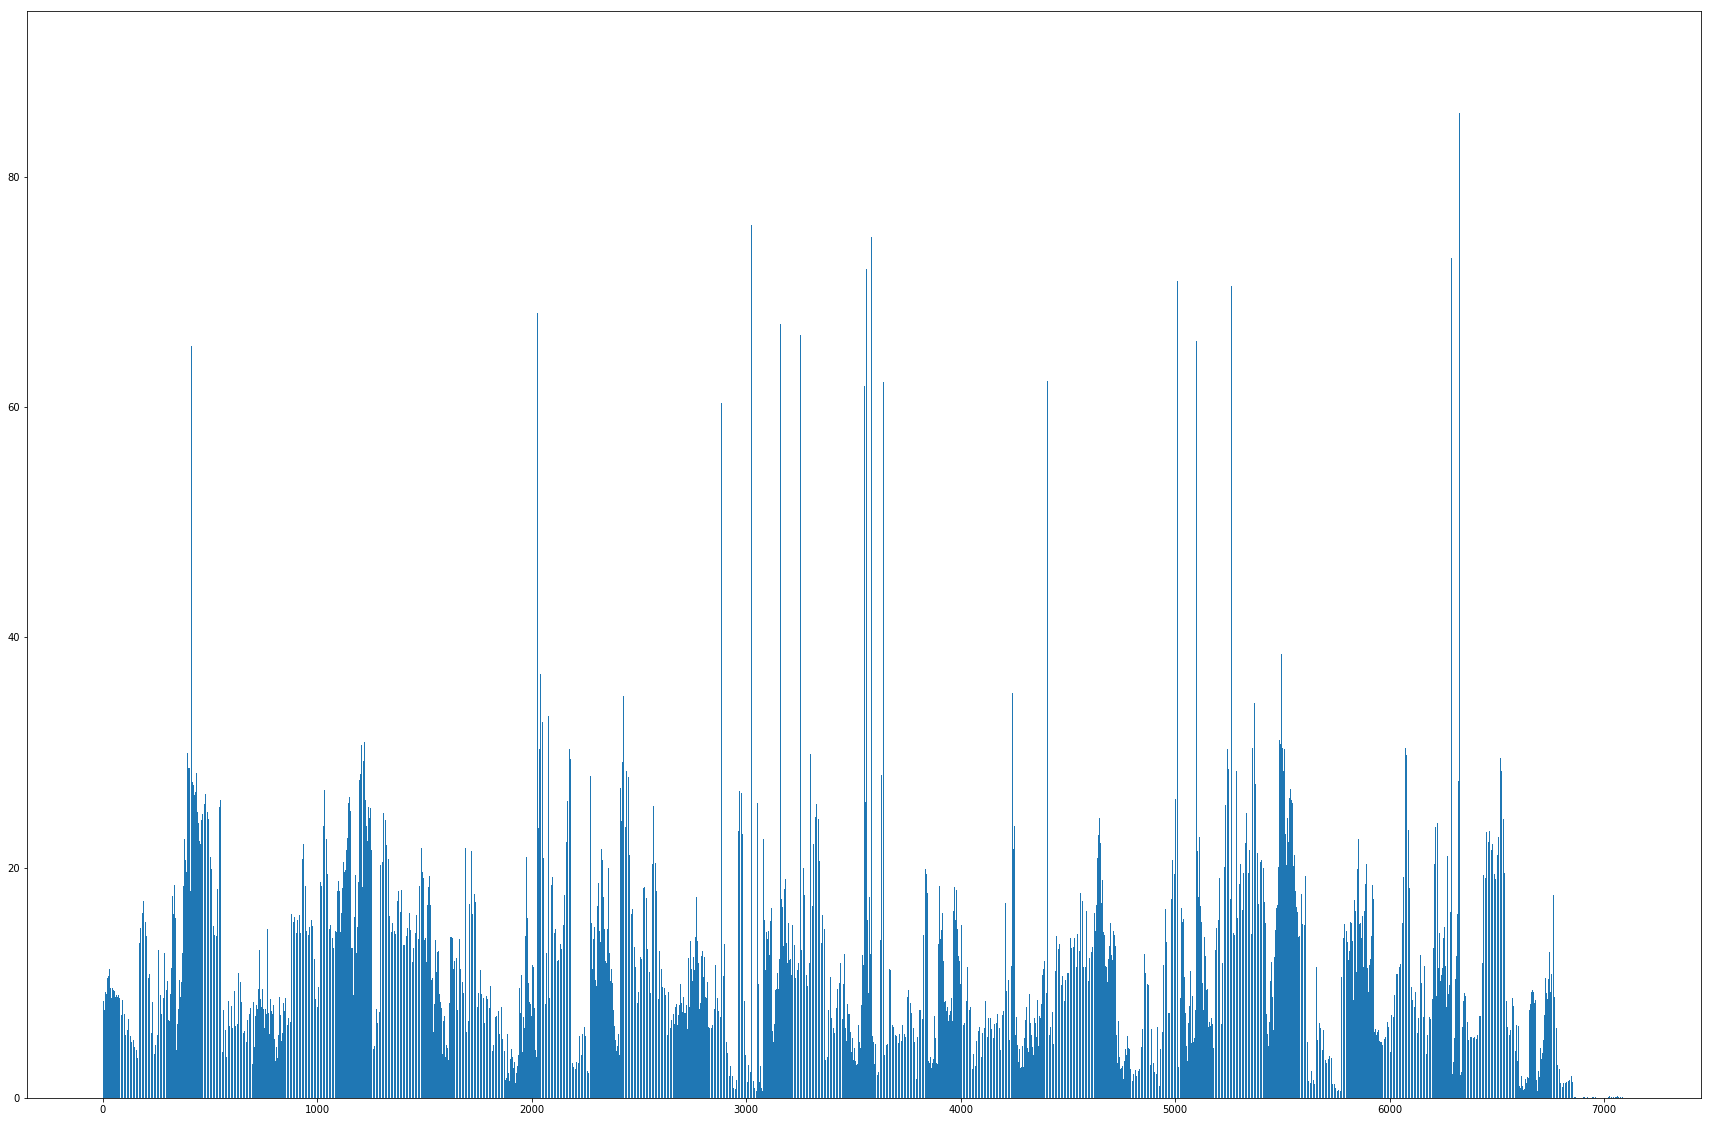

In [111]:
plt.figure(figsize = (30, 20))
plt.bar(x = raw_stats['Frame Number'], height = raw_stats['content_val'])
plt.show

<Figure size 2160x1440 with 0 Axes>

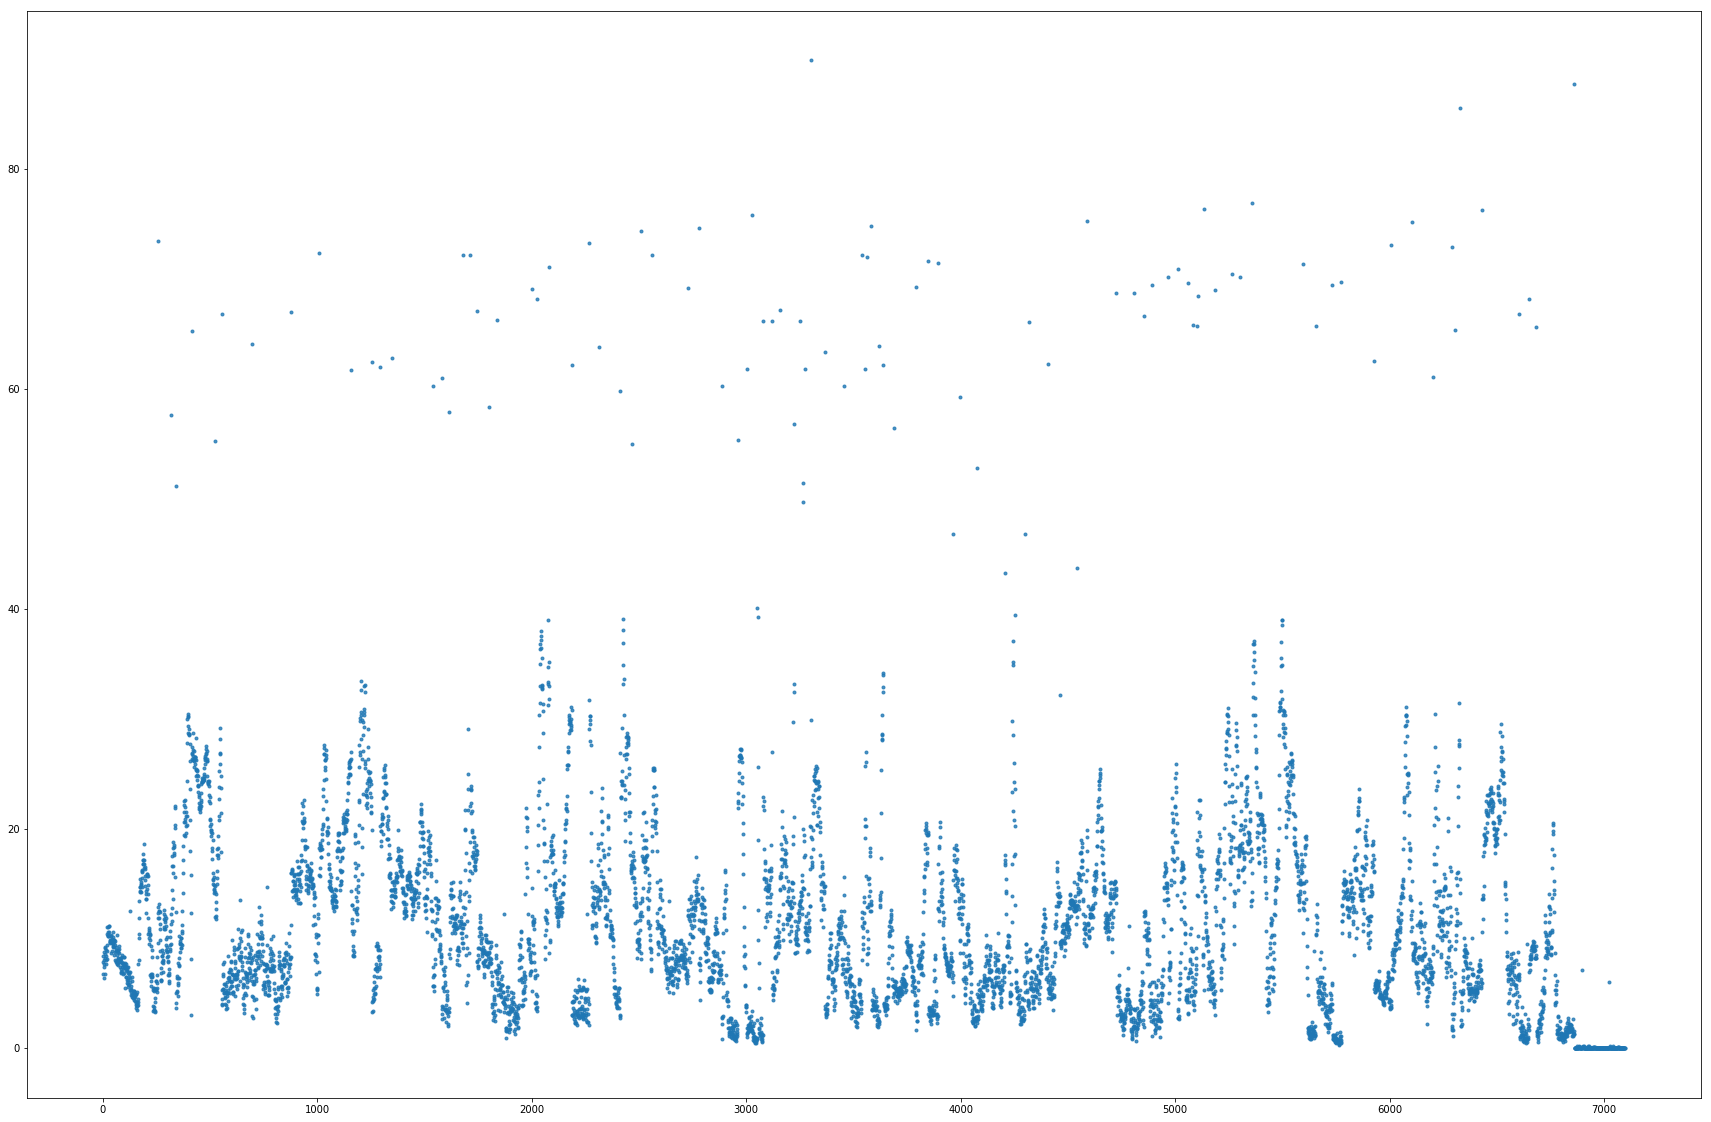

In [113]:
plt.figure(figsize = (30, 20))
plt.scatter(x = raw_stats['Frame Number'], y = raw_stats['content_val'], marker = '.', alpha=0.8)

#plt.scatter(x = raw_stats['Frame Number'], y = raw_stats['delta_hue'], marker = '.', alpha=0.8)
#plt.scatter(x = raw_stats['Frame Number'], y = raw_stats['delta_lum'], marker = '.', alpha=0.8)
#plt.scatter(x = raw_stats['Frame Number'], y = raw_stats['delta_sat'], marker = '.', alpha=0.8)

<Figure size 2160x1440 with 0 Axes>

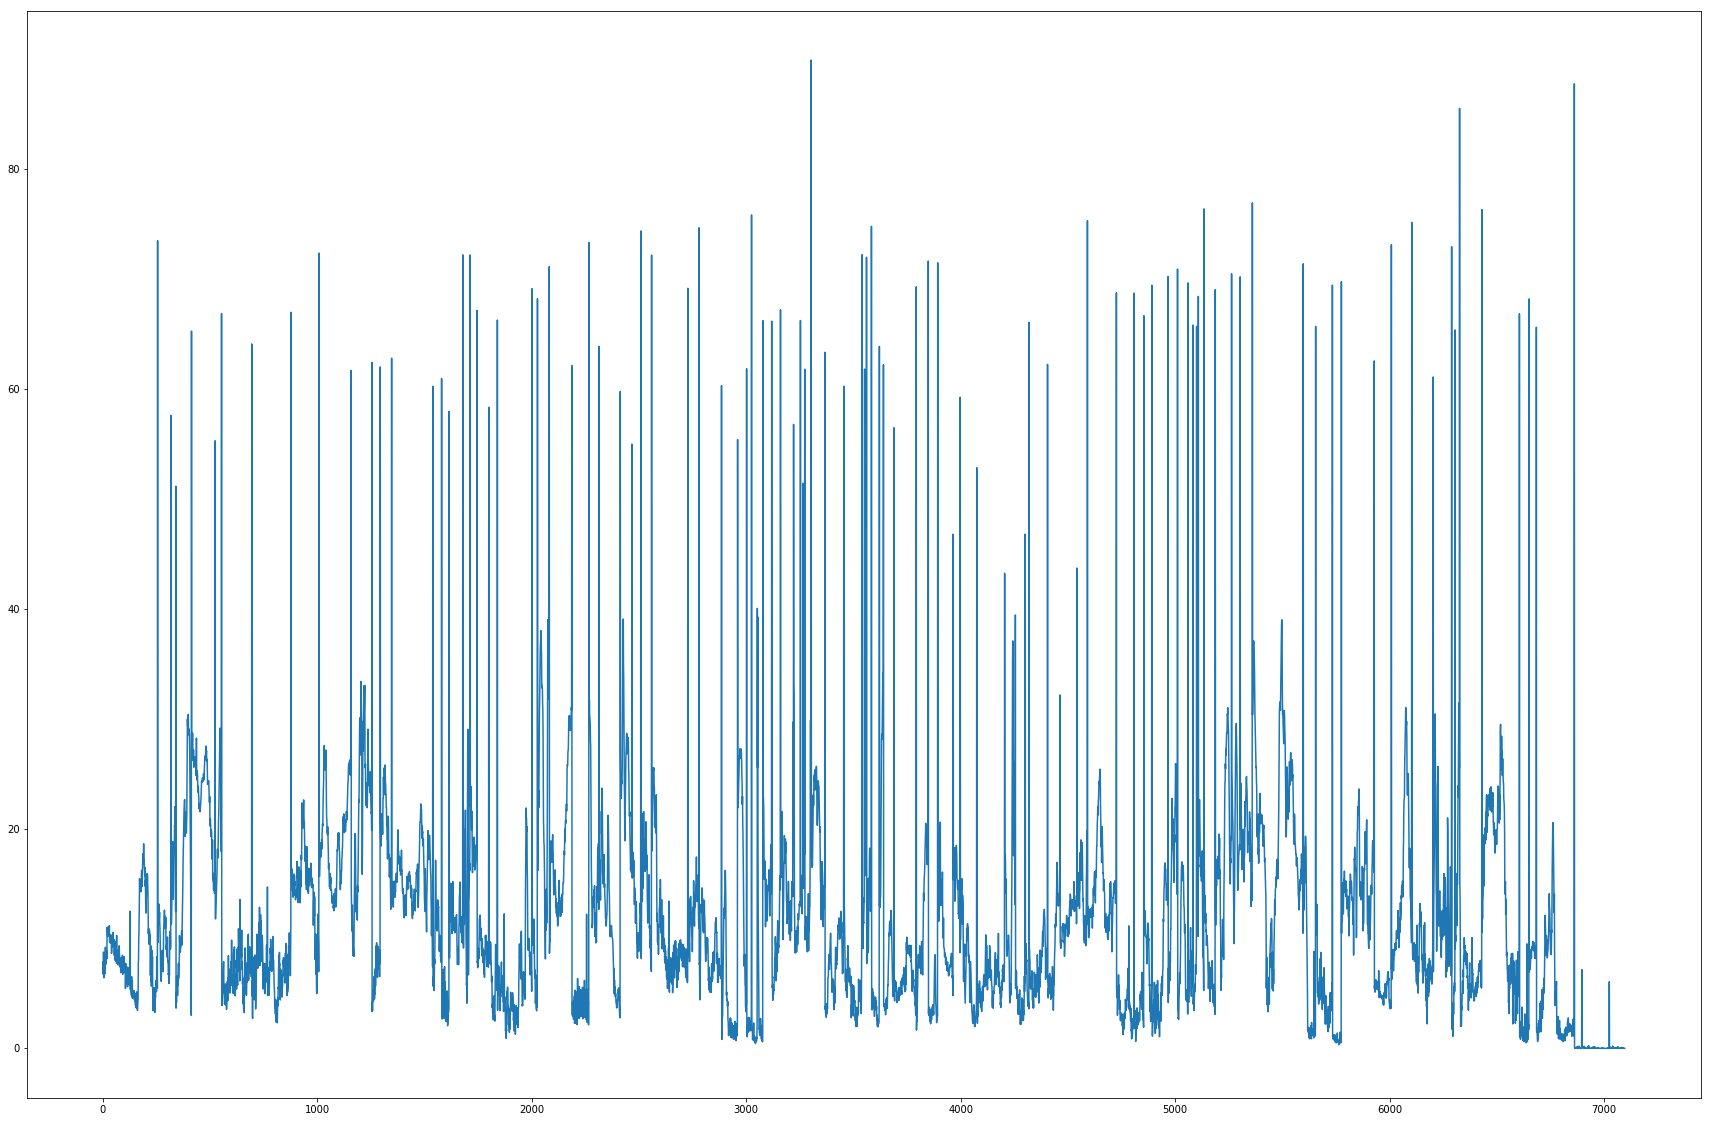

In [116]:
plt.figure(figsize = (30, 20))
plt.plot('Frame Number', 'content_val', data=raw_stats)

### Looking At Detected Cuts And Their Surrounding Frames

In [131]:
# Input an iterable of frames and output no. of specified frames before and after that frame
# Default is 10 frames before and after
def investigate(list_of_frames, before = 10, after = 10):
    frames = []
    for frame in list_of_frames:
        frames.extend(np.arange(frame - before, frame + after + 1))
    return raw_stats[raw_stats['Frame Number'].isin(frames)]

In [49]:
investigate(shotlist_raw['Start Frame'], before = 1, after = 0) 

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
254,255,00:00:10.636,5.496564,4.255561,3.903700,8.330431
255,256,00:00:10.677,73.488806,71.404026,90.454725,58.607666
316,317,00:00:13.222,9.476481,9.786594,5.888970,12.753879
317,318,00:00:13.263,57.597331,50.352458,74.092231,48.347304
339,340,00:00:14.181,12.452402,17.560438,5.134874,14.661892
340,341,00:00:14.223,51.146213,46.163140,63.511068,43.764431
395,396,00:00:16.516,29.333451,25.938449,30.692600,31.369303
396,397,00:00:16.558,30.282489,25.360270,31.351156,34.136041
412,413,00:00:17.226,3.001664,1.163493,2.603082,5.238417
413,414,00:00:17.267,65.264712,69.285400,57.310981,69.197754


- 2074, 2174, 3637 and 6322 seem off, as the difference in hsv vals was not too great

In [43]:
investigate([2074, 2174, 3637, 6322], before = 1, after = 0)

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
2072,2073,00:01:26.461,22.255380,13.965522,22.434652,30.365967
2073,2074,00:01:26.503,31.238444,21.959554,32.415690,39.340088
2172,2173,00:01:30.632,29.837086,18.109077,25.149414,46.252767
2173,2174,00:01:30.674,30.196316,19.777805,24.805230,46.005914
3635,3636,00:02:31.651,32.417562,21.438097,32.027127,43.787462
3636,3637,00:02:31.693,33.998390,22.150743,34.014730,45.829698
6320,6321,00:04:23.638,27.518636,23.005887,17.194282,42.355740
6321,6322,00:04:23.680,31.452157,24.944933,23.833957,45.577582


### Correctly Detected (But How?)

- The following frames were correctly detected cuts, but when compared to the preceeding frame, the change in hsv values was not a lot
    - 2074 
    - 2174 
    - 3637
    - 6322

In [129]:
def investigate_frame(frame, before = 20, after = 20):
    frame_ = investigate([frame], before = before, after = after)
    plt.figure(figsize = (10, 8))
    plt.xlabel('Frame Number')
    plt.ylabel('Average HSV Value')
    plt.bar(x = frame_['Frame Number'], height = frame_['content_val'])
    return frame_

- What we see below essentially tells us that the cuts actually occured a few frames later where there was a reasonable difference between successive hsv values. This is good, as we can actually detect these cuts when scanning for the hsv difference. 
- It is strange that the begin frames of those cuts were labelled a few frames earlier by the algorithm. But it doesn't matter too much as we have a solution.

#### Frame #2074

- The actual cut should have been made at frame #2081 and not 2074

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
2058,2059,00:01:25.877,17.034505,10.781847,15.274767,25.046902
2059,2060,00:01:25.919,15.592692,10.003554,13.928304,22.846219
2060,2061,00:01:25.961,11.972846,7.593913,11.138319,17.186306
2061,2062,00:01:26.003,10.309932,4.501519,8.322211,18.106066
2062,2063,00:01:26.044,9.212791,5.391249,7.168620,15.078505
2063,2064,00:01:26.086,8.139911,3.395969,6.627224,14.396539
2064,2065,00:01:26.128,11.641936,5.025960,9.942193,19.957655
2065,2066,00:01:26.169,11.743236,4.988064,9.523383,20.718262
2066,2067,00:01:26.211,10.751374,4.593506,9.277615,18.383002
2067,2068,00:01:26.253,14.492622,9.259738,12.119548,22.098579


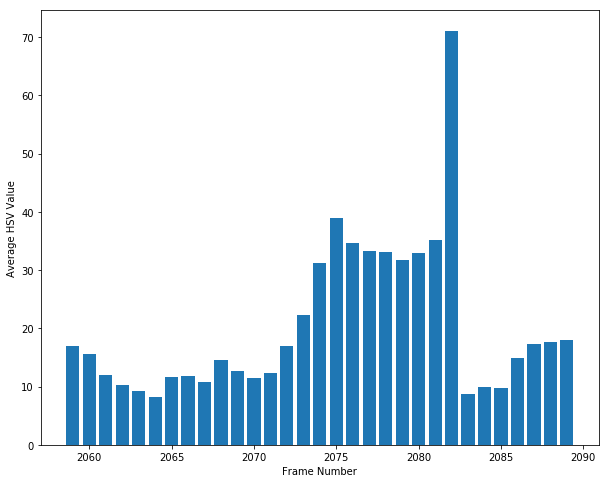

In [30]:
investigate_frame(2074, 15, 15)

#### Frame #2174

- The actual cut should have been made at #2186

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
2153,2154,00:01:29.840,19.947121,11.454481,11.138889,37.247993
2154,2155,00:01:29.881,18.778474,10.576090,10.633165,35.126166
2155,2156,00:01:29.923,18.878111,11.387777,10.906494,34.340061
2156,2157,00:01:29.965,20.409306,13.414605,11.388563,36.424750
2157,2158,00:01:30.007,20.770752,12.290419,12.339708,37.682129
2158,2159,00:01:30.048,20.480017,11.696506,12.974419,36.769124
2159,2160,00:01:30.090,21.739475,12.641629,13.404053,39.172743
2160,2161,00:01:30.132,21.830874,12.493381,14.532254,38.466987
2161,2162,00:01:30.173,22.244629,13.107205,14.847521,38.779161
2162,2163,00:01:30.215,21.596861,12.876411,15.095459,36.818712


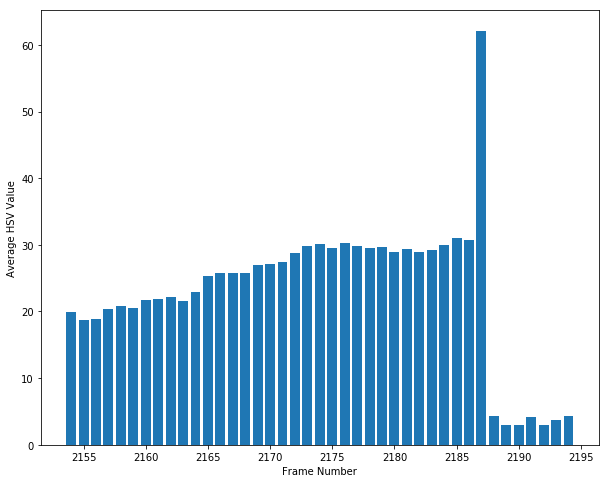

In [31]:
investigate_frame(2174)

- The following were incorrectly detected cuts, but the hsv difference between it and the previous frame were massive:
    - 3052 (locker explosion... understandable)
    - 4319 (gunshot, but without spark.... WHY)

#### Frame #3637

- Actual cut should be at #3639

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
3621,3622,00:02:31.068,13.003309,10.408664,10.493462,18.107802
3622,3623,00:02:31.109,13.532534,10.672255,11.176351,18.748996
3623,3624,00:02:31.151,12.831552,9.735813,10.944309,17.814535
3624,3625,00:02:31.193,13.945774,11.811117,10.969699,19.056505
3625,3626,00:02:31.234,13.726617,11.326335,10.734972,19.118544
3626,3627,00:02:31.276,14.217403,12.173828,10.840956,19.637424
3627,3628,00:02:31.318,17.283402,14.563314,13.688151,23.598741
3628,3629,00:02:31.360,21.377758,18.507595,17.163574,28.462104
3629,3630,00:02:31.401,25.288402,22.056424,21.344238,32.464545
3630,3631,00:02:31.443,28.029496,23.205078,24.357639,36.525770


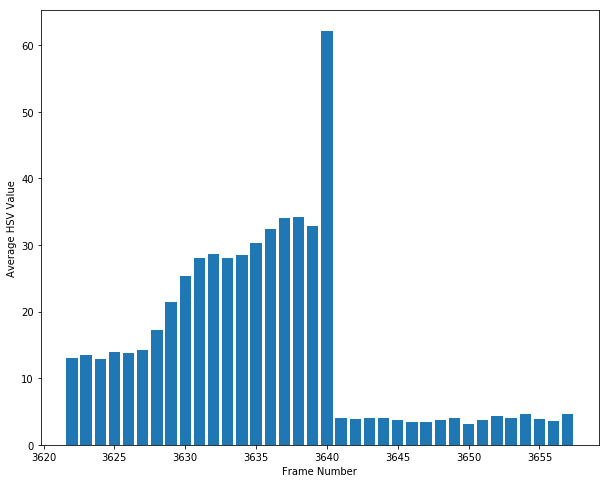

In [33]:
investigate_frame(3637, before=15)

#### Frame #6322

- Actual cut at 6325

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat,content_val_diff
6306,6307,00:04:23.054,10.313531,10.956896,5.809923,14.173774,0
6307,6308,00:04:23.096,9.737142,10.515272,5.484863,13.211290,0
6308,6309,00:04:23.138,11.249928,11.942030,6.159804,15.647949,0
6309,6310,00:04:23.180,15.466942,16.118083,8.944200,21.338542,0
6310,6311,00:04:23.221,12.710277,13.289876,7.488878,17.352078,0
6311,6312,00:04:23.263,12.280536,14.007406,6.536350,16.297852,0
6312,6313,00:04:23.305,11.589943,12.873210,7.142931,14.753689,0
6313,6314,00:04:23.346,11.184417,12.500787,6.777452,14.275011,0
6314,6315,00:04:23.388,15.933530,17.564128,8.249295,21.987169,0
6315,6316,00:04:23.430,14.901801,15.995090,8.418891,20.291423,0


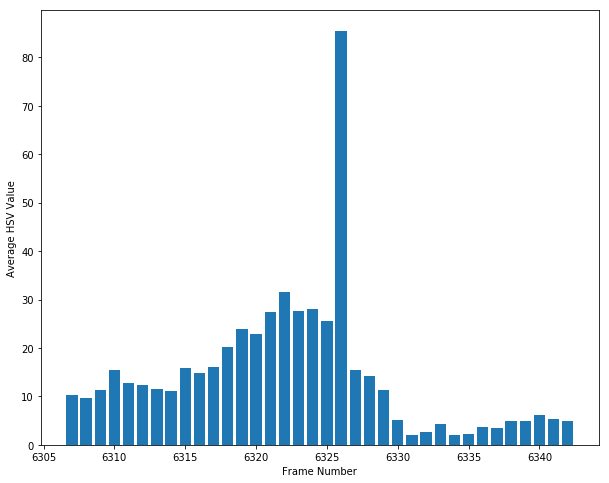

In [132]:
investigate_frame(6322, before = 15)

### Incorrectly Detected Cuts

- Cuts were detected at the following frames when they shouldn't have been:
    - 397
    - 1199
    - 1217
    - 2042
    - 2428
    - 3052
    - 4242
    - 4319
    - 5243
    - 5486
    - 5501
    - 6074
- I knew to check these frames after having actually watched the video with the csv file open as an Excel Spreadsheet on the side. However, as we will see, most of these frames could've been detected by looking at the HSL differential as well

- We could iterate over these frames using the 'investigate_frame' function in the future, but for this case, a frame by frame analysis will be done.
- It should be noted that I have the csv open in a different window in order to exclude that 'start frames' of the previous and next shot

To save time, in the brackets below beside the #frame, I've written the conclusion after looking at the HSL graphs of the surrounding frames

#### Frame #397 (Not a Cut)

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
386,387,00:00:16.141,21.156557,22.085042,21.222873,20.161757
387,388,00:00:16.183,21.482133,22.986057,21.972656,19.487684
388,389,00:00:16.225,20.241726,22.235623,19.503065,18.986491
389,390,00:00:16.266,19.590151,20.164469,19.076253,19.529731
390,391,00:00:16.308,20.353959,20.679932,19.066108,21.315837
391,392,00:00:16.350,21.158366,20.435737,20.082601,22.956760
392,393,00:00:16.391,24.344130,23.592177,23.984104,25.456109
393,394,00:00:16.433,27.811216,29.197971,28.865397,25.370280
394,395,00:00:16.475,29.965911,29.944797,32.418294,27.534641
395,396,00:00:16.516,29.333451,25.938449,30.692600,31.369303


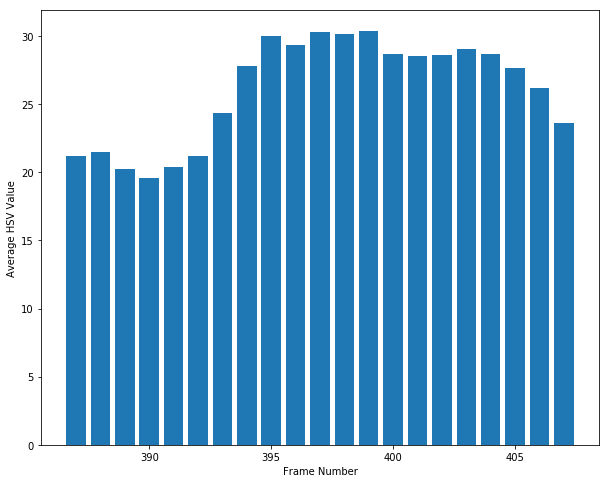

In [57]:
investigate_frame(397, before = 10, after = 10)

#### Frame #1199 (Not a Cut)

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
1188,1189,00:00:49.591,14.222656,13.057753,7.650499,21.959717
1189,1190,00:00:49.633,15.342448,14.731581,9.015951,22.279812
1190,1191,00:00:49.675,16.660211,15.314860,9.191949,25.473823
1191,1192,00:00:49.716,18.769350,17.936578,9.133898,29.237576
1192,1193,00:00:49.758,20.280680,19.400960,10.486952,30.954129
1193,1194,00:00:49.800,22.641864,20.047173,13.235324,34.643094
1194,1195,00:00:49.841,22.411784,17.253120,16.079129,33.903103
1195,1196,00:00:49.883,25.567853,19.878771,18.994656,37.830132
1196,1197,00:00:49.925,27.614891,22.024848,22.440457,38.379367
1197,1198,00:00:49.967,29.755073,23.503309,24.561252,41.200656


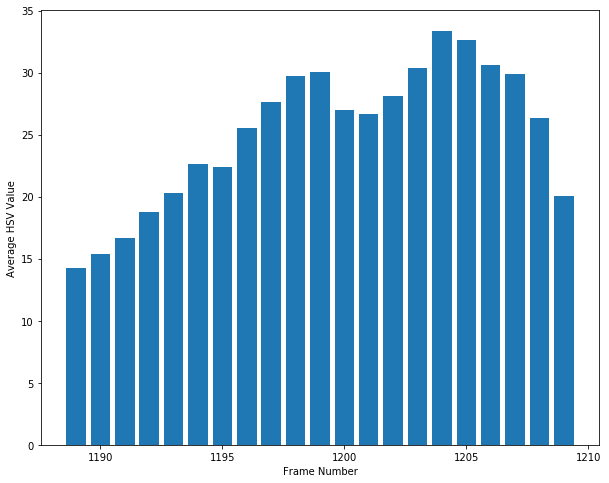

In [70]:
investigate_frame(1199, before = 10, after = 10)

#### Frame #1217 (Not a Cut)

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
1206,1207,00:00:50.342,29.861328,22.281738,28.387967,38.914280
1207,1208,00:00:50.384,26.341752,19.676541,24.377143,34.971571
1208,1209,00:00:50.425,20.051857,15.933024,16.352485,27.870063
1209,1210,00:00:50.467,15.840368,12.716146,11.544406,23.260552
1210,1211,00:00:50.509,18.279595,10.506076,13.208171,31.124539
1211,1212,00:00:50.550,23.184959,14.070828,15.728244,39.755805
1212,1213,00:00:50.592,28.497305,14.521918,19.649604,51.320394
1213,1214,00:00:50.634,29.741383,13.983941,21.777995,53.462212
1214,1215,00:00:50.676,27.050709,13.869439,20.424561,46.858127
1215,1216,00:00:50.717,29.224799,15.104112,25.048394,47.521891


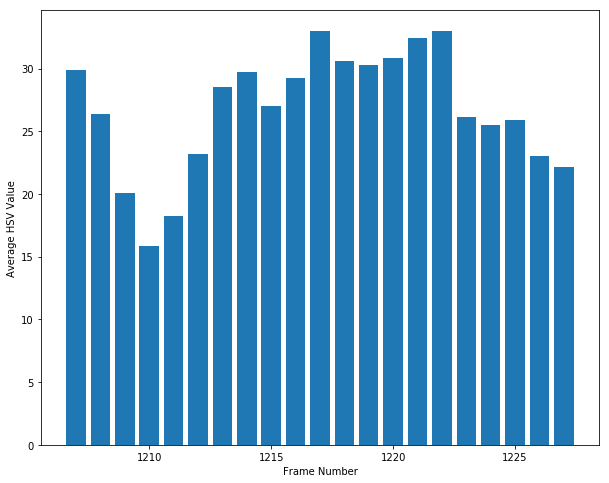

In [74]:
investigate_frame(1217, 10, 10)

#### Frame #2042 (Not a Cut)

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
2031,2032,00:01:24.751,23.443866,26.878499,20.954942,22.498155
2032,2033,00:01:24.793,21.908348,26.084066,20.724013,18.916965
2033,2034,00:01:24.835,24.231554,30.103706,21.771539,20.819417
2034,2035,00:01:24.876,27.396186,36.157905,23.645508,22.385145
2035,2036,00:01:24.918,30.310158,40.835666,25.399794,24.695014
2036,2037,00:01:24.960,31.469365,43.942003,25.675320,24.790771
2037,2038,00:01:25.002,32.969681,49.532335,24.481771,24.894938
2038,2039,00:01:25.043,34.933847,54.636095,24.061334,26.104112
2039,2040,00:01:25.085,36.319933,58.287598,24.152724,26.519477
2040,2041,00:01:25.127,36.790102,58.193766,24.590820,27.585720


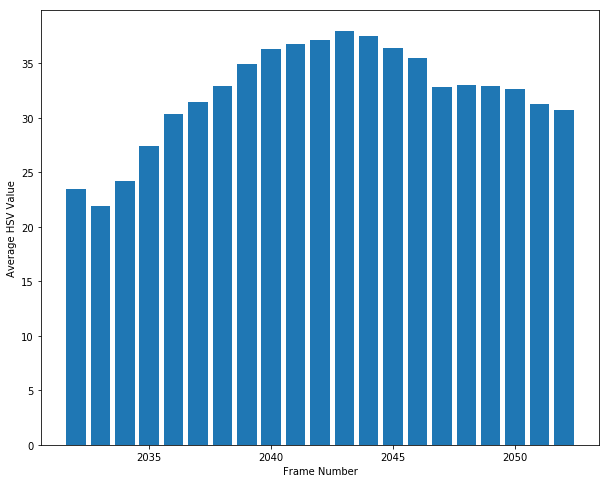

In [75]:
investigate_frame(2042, 10, 10)

#### Frame #2428 (Not a Cut)

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
2417,2418,00:01:40.851,22.855839,18.175564,20.613932,29.778022
2418,2419,00:01:40.892,23.999367,20.195231,22.172011,29.630859
2419,2420,00:01:40.934,24.322012,21.177382,22.901150,28.887505
2420,2421,00:01:40.976,24.091833,21.679769,22.211155,28.384576
2421,2422,00:01:41.018,25.237214,21.114041,23.506456,31.091146
2422,2423,00:01:41.059,29.174425,23.424940,27.467312,36.631022
2423,2424,00:01:41.101,33.183503,27.088759,30.811198,41.650553
2424,2425,00:01:41.143,36.849709,32.157688,33.583849,44.807590
2425,2426,00:01:41.184,38.088795,35.757541,34.127279,44.381565
2426,2427,00:01:41.226,39.064137,38.103488,33.842828,45.246094


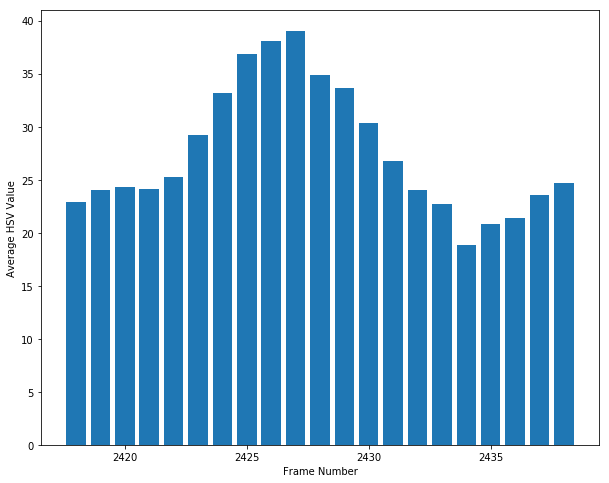

In [76]:
investigate_frame(2428, 10, 10)

#### Frame #3052 (Cut -- Locker Explosion)

- This almost certainly looks like a cut
- However, it actually isn't because when you watch the clip, there is a little explosion which causes a spark, which explains the jump in the HSV values
- This will be challenging to rectify. However, this isn't a frequent occurence, so it won't affect our accuracy too much

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
3031,3032,00:02:06.460,2.008735,0.948730,0.840956,4.236518
3032,3033,00:02:06.501,1.010941,0.306451,0.558133,2.168240
3033,3034,00:02:06.543,1.423982,0.622287,0.670275,2.979384
3034,3035,00:02:06.585,2.314616,1.091743,0.974745,4.877360
3035,3036,00:02:06.626,0.693160,0.158339,0.429579,1.491564
3036,3037,00:02:06.668,0.975921,0.474637,0.494032,1.959093
3037,3038,00:02:06.710,1.114647,0.543837,0.434896,2.365207
3038,3039,00:02:06.752,0.824246,0.221490,0.504259,1.746989
3039,3040,00:02:06.793,0.835422,0.441271,0.327420,1.737576
3040,3041,00:02:06.835,0.568857,0.247803,0.292969,1.165799


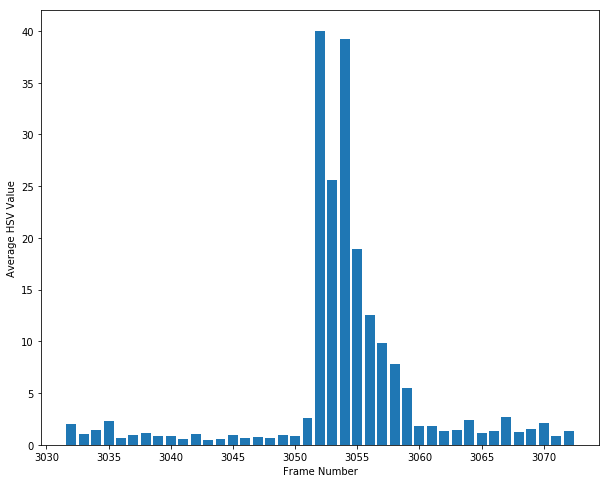

In [77]:
investigate_frame(3052)

#### Frame #4242 (Not a Cut)

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
4226,4227,00:02:56.301,6.991663,4.516466,5.039849,11.418674
4227,4228,00:02:56.343,4.990994,3.278185,3.434570,8.260227
4228,4229,00:02:56.385,4.146430,3.080946,1.932970,7.425374
4229,4230,00:02:56.426,4.248852,3.423503,2.235460,7.087592
4230,4231,00:02:56.468,5.094419,4.055122,2.475993,8.752143
4231,4232,00:02:56.510,4.741564,3.830865,2.367160,8.026666
4232,4233,00:02:56.551,4.895164,3.829047,2.423828,8.432617
4233,4234,00:02:56.593,5.824843,4.338026,2.881619,10.254883
4234,4235,00:02:56.635,4.924344,3.579427,2.554769,8.638835
4235,4236,00:02:56.676,8.254521,5.982910,4.519721,14.260932


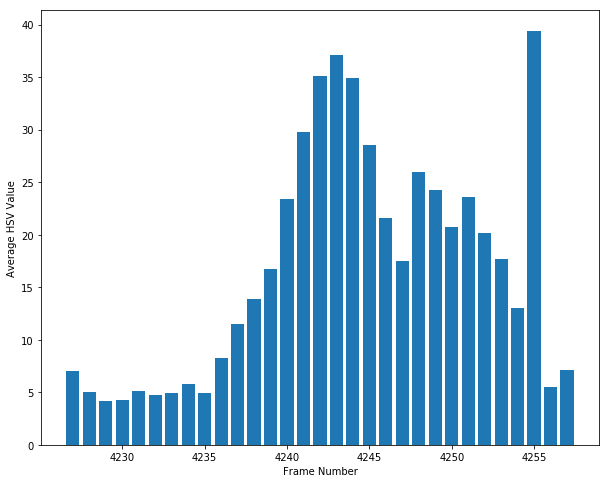

In [80]:
investigate_frame(4242, 15, 15)

#### Frame #4319 (Cut -- Weird)

- This looks like a cut
- While watching the video, there was a gunshot that trigerred the cut. But this is strange, as there was no spark. 
- The HSV spiked up for one frame and returned back to usual. Is this how it is for the correctly detected cuts too? Could help rectify this error if it isn't.

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
4303,4304,00:02:59.513,9.478579,5.628364,5.509494,17.297879
4304,4305,00:02:59.554,9.521358,6.111382,5.147949,17.304742
4305,4306,00:02:59.596,8.803385,5.937093,4.516303,15.956760
4306,4307,00:02:59.638,7.897361,5.334608,3.944824,14.412652
4307,4308,00:02:59.679,8.040817,5.741509,3.801215,14.579725
4308,4309,00:02:59.721,6.978380,4.600043,3.655762,12.679335
4309,4310,00:02:59.763,5.328939,3.479791,2.985189,9.521837
4310,4311,00:02:59.805,5.101382,3.425917,2.629666,9.248562
4311,4312,00:02:59.846,4.300049,2.762668,2.344618,7.792860
4312,4313,00:02:59.888,3.844880,2.469971,2.090549,6.974121


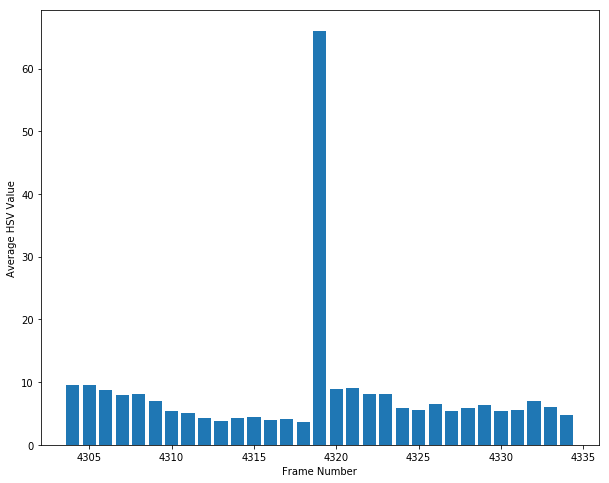

In [83]:
investigate_frame(4319, 15, 15)

#### Frame #5243 (Not a Cut)

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
5227,5228,00:03:38.051,15.418909,12.659505,11.197673,22.399550
5228,5229,00:03:38.093,16.882252,14.068387,12.070747,24.507623
5229,5230,00:03:38.135,20.038267,16.639106,14.706570,28.769124
5230,5231,00:03:38.176,22.270309,18.001953,16.474284,32.334690
5231,5232,00:03:38.218,24.209147,20.160102,17.497396,34.969944
5232,5233,00:03:38.260,24.259883,19.435574,17.957465,35.386610
5233,5234,00:03:38.301,25.897380,21.799072,19.001112,36.891954
5234,5235,00:03:38.343,25.439679,21.159397,18.898139,36.261502
5235,5236,00:03:38.385,27.231183,22.617269,20.303928,38.772352
5236,5237,00:03:38.427,26.689399,22.144775,19.834201,38.089220


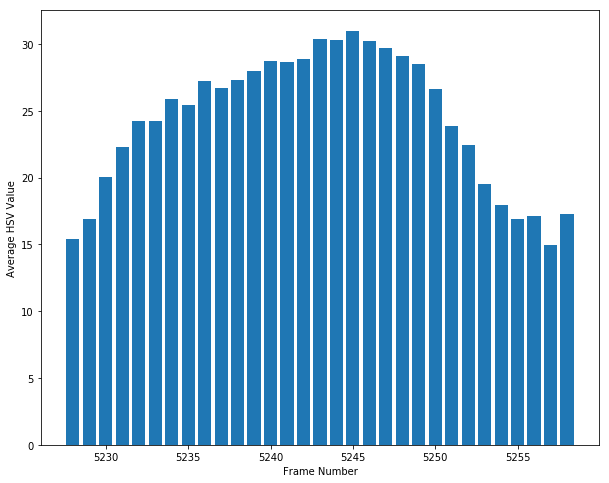

In [85]:
investigate_frame(5243, 15, 15)

#### Frame #5486 (Not a Cut)

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
5470,5471,00:03:48.186,14.707149,12.053196,9.101725,22.966526
5471,5472,00:03:48.228,15.273230,13.017687,9.422580,23.379422
5472,5473,00:03:48.270,16.477132,14.317980,10.431342,24.682075
5473,5474,00:03:48.311,16.883771,14.663818,10.718153,25.269341
5474,5475,00:03:48.353,16.749684,14.248264,10.795926,25.204861
5475,5476,00:03:48.395,17.207755,14.402588,11.074788,26.145888
5476,5477,00:03:48.437,16.736220,13.536594,10.847032,25.825033
5477,5478,00:03:48.478,16.441271,13.210422,10.776964,25.336426
5478,5479,00:03:48.520,15.428286,12.296848,9.870768,24.117242
5479,5480,00:03:48.562,17.055284,13.817491,11.243951,26.104411


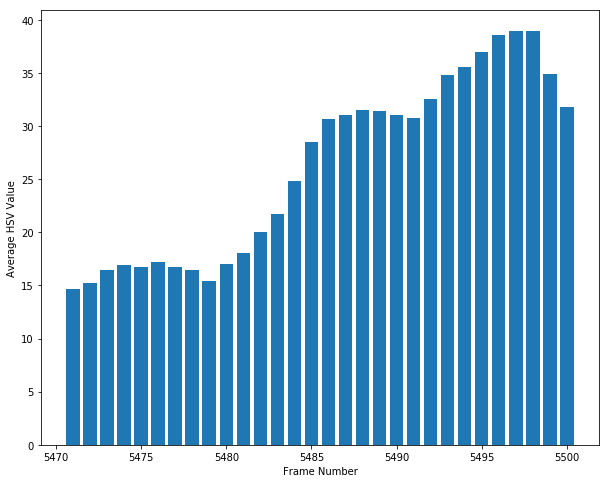

In [86]:
investigate_frame(5486, 15, 14)

#### Frame #5501 (Not a Cut)

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
5486,5487,00:03:48.854,31.040591,24.822374,24.609565,43.689833
5487,5488,00:03:48.895,31.520960,25.647298,24.908447,44.007134
5488,5489,00:03:48.937,31.460793,26.138238,24.467122,43.777018
5489,5490,00:03:48.979,31.068703,25.687446,24.058892,43.459771
5490,5491,00:03:49.020,30.751827,25.389513,24.010715,42.855252
5491,5492,00:03:49.062,32.521602,27.507514,25.234022,44.823269
5492,5493,00:03:49.104,34.772289,29.738851,27.160726,47.417291
5493,5494,00:03:49.146,35.548910,30.442627,28.229953,47.974148
5494,5495,00:03:49.187,37.006302,31.988308,29.525526,49.505073
5495,5496,00:03:49.229,38.557961,33.597385,31.468940,50.607558


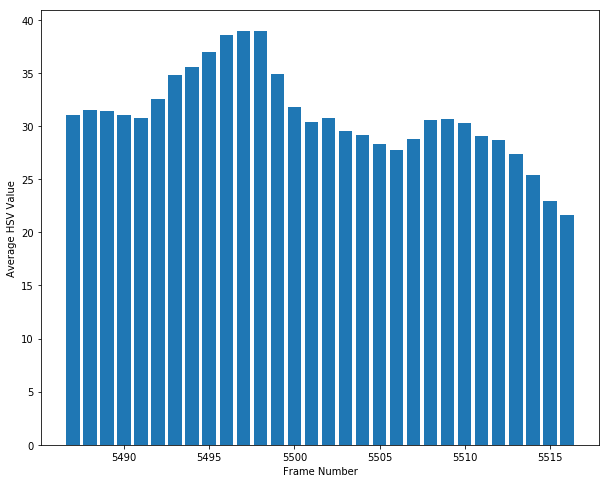

In [87]:
investigate_frame(5501, 14, 15)

#### Frame #6074 (Not a Cut)

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
6053,6054,00:04:12.502,13.891620,15.852946,6.952230,18.869683
6054,6055,00:04:12.544,13.638274,14.770888,7.367133,18.776801
6055,6056,00:04:12.586,14.669461,16.358453,7.604112,20.045817
6056,6057,00:04:12.627,14.842339,17.056885,7.196587,20.273546
6057,6058,00:04:12.669,13.896023,15.439914,7.319634,18.928521
6058,6059,00:04:12.711,14.155165,15.516981,7.451280,19.497233
6059,6060,00:04:12.752,15.218108,16.938938,7.574083,21.141303
6060,6061,00:04:12.794,13.773781,14.619412,7.694417,19.007514
6061,6062,00:04:12.836,14.589889,15.904026,7.898085,19.967556
6062,6063,00:04:12.878,15.425781,16.748183,8.431885,21.097276


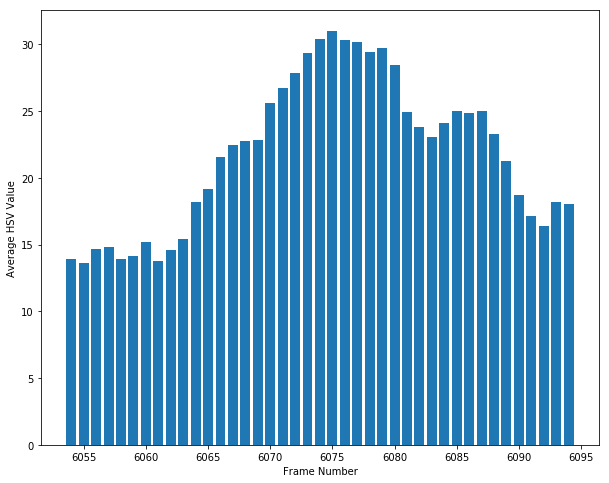

In [88]:
investigate_frame(6074)

### Undetected Cuts

- There were two missed cuts between frames 3541-3561 & 5100-5134
- Again, I knew that they were missing and look between these frames by actually viewing the video but this could be detected by the HSV differential too
- Upon investigating, its pretty clear that cuts should have been detected at frame 3552 and 5108

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
3540,3541,00:02:27.689,72.223434,53.196262,64.945747,98.528293
3541,3542,00:02:27.731,12.414017,9.191243,8.907769,19.143039
3542,3543,00:02:27.773,10.088153,8.034234,7.126139,15.104085
3543,3544,00:02:27.814,9.494909,8.080675,6.424723,13.979329
3544,3545,00:02:27.856,9.078252,8.294217,5.979058,12.961480
3545,3546,00:02:27.898,10.929027,9.319010,7.533963,15.934109
3546,3547,00:02:27.939,11.505389,9.074599,8.468750,16.972819
3547,3548,00:02:27.981,11.395273,8.807156,8.507107,16.871555
3548,3549,00:02:28.023,12.357223,10.119575,9.387560,17.564535
3549,3550,00:02:28.065,13.730559,9.614339,11.369032,20.208306


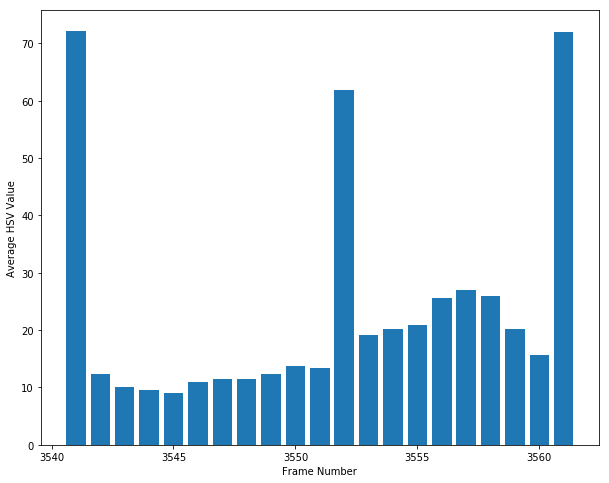

In [37]:
investigate_frame(3541, before = 0, after = 20) 

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
5099,5100,00:03:32.712,65.687572,50.967394,52.859158,93.236165
5100,5101,00:03:32.754,13.937527,13.710341,8.952745,19.149495
5101,5102,00:03:32.796,17.727629,17.326931,12.717584,23.138373
5102,5103,00:03:32.838,18.946253,18.879503,12.761664,25.197591
5103,5104,00:03:32.879,21.465766,23.148438,13.139676,28.109185
5104,5105,00:03:32.921,18.218524,18.996853,12.212945,23.445774
5105,5106,00:03:32.963,13.879747,13.928955,9.642795,18.067491
5106,5107,00:03:33.004,10.194083,9.632595,6.303792,14.645860
5107,5108,00:03:33.046,68.428639,50.207845,60.107042,94.971029
5108,5109,00:03:33.088,17.465070,17.043647,12.749620,22.601942


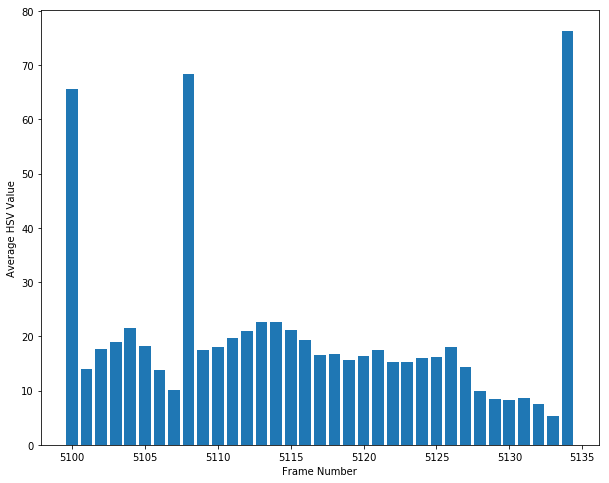

In [39]:
investigate_frame(5100, before = 0, after = 34) 

#### Summary
.
.
##### Result before investigation: 

107 detected cuts
107 - 12 + 2 = 97 actual cuts

By running a custom algorithm that checks for the differences between hsv values between successive frames, we should be able to correct 10/12 incorrectly detected cuts and 2 additional undetected cuts.
As a result however, we would detect 4 extra cuts.

##### Result after investigation: 

Actual number of cuts: 97
Potentially correctly detected cuts: 97 + 2 + 4 = 103 cuts
.
.


#### Next Steps
1. Look at the actual images for these frames that are to be investigated
2. Understand how the algorithm actually works to rectify these errors

# Calculating 'content_val' Differential

In [106]:
temp = raw_stats[1:]
temp.reset_index(drop = True, inplace = True)

In [107]:
temp['content_val_diff'] = temp['content_val'] - raw_stats['content_val']

/Users/rahulsomani/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
raw_stats['content_val_diff'] = 0
raw_stats2 = pd.concat([raw_stats.iloc[:1], temp])
raw_stats2.reset_index(drop = True, inplace = True)
raw_stats2['content_val_diff'] = raw_stats2['content_val_diff'].abs()

In [140]:
raw_stats2[raw_stats2['content_val_diff'] > 20].iloc[50:100]

,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat,content_val_diff
2266,2267,00:01:34.553,73.312952,70.363471,57.725993,91.849392,69.242423
2267,2268,00:01:34.594,29.094446,27.908773,11.788764,47.585802,44.218506
2313,2314,00:01:36.513,63.862793,64.812500,42.790717,83.985162,51.208496
2314,2315,00:01:36.555,12.897841,6.390408,5.430583,26.872531,50.964952
2412,2413,00:01:40.642,59.778438,66.575005,51.116455,61.643853,56.729320
2413,2414,00:01:40.684,26.885607,18.864475,23.947021,37.845323,32.892831
2466,2467,00:01:42.894,54.978416,46.388184,49.612115,68.934950,37.932925
2467,2468,00:01:42.936,16.775373,14.372884,11.284559,24.668674,38.203044
2508,2509,00:01:44.646,74.375054,56.999403,64.929199,101.196560,61.976246
2509,2510,00:01:44.688,8.708993,6.123861,3.805257,16.197862,65.666061


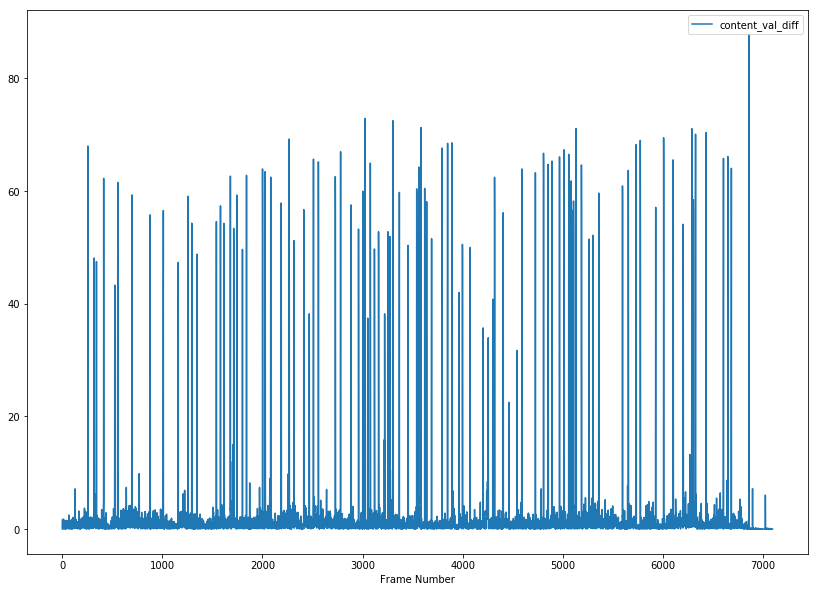

In [126]:
raw_stats2.plot(x = 'Frame Number', y = 'content_val_diff', figsize = (14, 10))